In [1]:
import tensorflow as tf
from tensorflow.python.layers.core import Dense
import os
import pickle
import copy
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def load_data(path):
    input_file = os.path.join(path)
    with open(input_file, 'r', encoding='utf-8') as f:
        data = f.read()
    return data

In [3]:
source_path = 'small_vocab_en.txt'
target_path = 'small_vocab_fr.txt'
source_text = load_data(source_path)
target_text = load_data(target_path)

In [4]:
CODES = {'<PAD>': 0, '<EOS>': 1, '<UNK>': 2, '<GO>': 3 }

def create_lookup_tables(text):
    # make a list of unique words
    vocab = set(text.split())
    print("###########"+str(len(vocab))+"###################")
    # (1)
    # starts with the special tokens
    vocab_to_int = copy.copy(CODES)
    #print(vocab_to_int)

    for v_i, v in enumerate(vocab, len(CODES)):
        vocab_to_int[v] = v_i
    #print(vocab_to_int)

    # (2)
    int_to_vocab = {v_i: v for v, v_i in vocab_to_int.items()}

    return vocab_to_int, int_to_vocab

In [5]:
def text_to_ids(source_text, target_text, source_vocab_to_int, target_vocab_to_int):
    # return: A tuple of lists (source_id_text, target_id_text) converted

    source_text_id = []
    target_text_id = []
    
  
    source_sentences = source_text.split("\n")
    target_sentences = target_text.split("\n")
    
    max_source_sentence_length = max([len(sentence.split(" ")) for sentence in source_sentences])
    max_target_sentence_length = max([len(sentence.split(" ")) for sentence in target_sentences])
    
   
    for i in range(len(source_sentences)):
        source_sentence = source_sentences[i]
        target_sentence = target_sentences[i]
        

        source_tokens = source_sentence.split(" ")
        target_tokens = target_sentence.split(" ")
        

        source_token_id = []
        target_token_id = []
        
        for index, token in enumerate(source_tokens):
            if (token != ""):
                source_token_id.append(source_vocab_to_int[token])
        
        for index, token in enumerate(target_tokens):
            if (token != ""):
                target_token_id.append(target_vocab_to_int[token])
                
        # put <EOS> token at the end of the chosen target sentence
        target_token_id.append(target_vocab_to_int['<EOS>'])
            
            
        source_text_id.append(source_token_id)
        target_text_id.append(target_token_id)
    
    print(source_text_id[0])
    print(target_text_id[0])
    
    return source_text_id, target_text_id


In [6]:
def preprocess_and_save_data(source_path, target_path, text_to_ids):
    # Preprocess
    source_text = load_data(source_path)
    target_text = load_data(target_path)

    source_text = source_text.lower()
    target_text = target_text.lower()


    source_vocab_to_int, source_int_to_vocab = create_lookup_tables(source_text)
    target_vocab_to_int, target_int_to_vocab = create_lookup_tables(target_text)


    source_text, target_text = text_to_ids(source_text, target_text, source_vocab_to_int, target_vocab_to_int)

    
    return (source_text, target_text),(source_vocab_to_int, target_vocab_to_int),(source_int_to_vocab, target_int_to_vocab)



In [7]:
preprocess_and_save_data(source_path, target_path, text_to_ids)

###########227###################
###########354###################
[120, 177, 4, 60, 154, 25, 116, 18, 179, 31, 4, 163, 212, 174, 74]
[311, 335, 284, 218, 136, 354, 347, 322, 273, 76, 96, 284, 21, 320, 68, 23, 1]


(([[120, 177, 4, 60, 154, 25, 116, 18, 179, 31, 4, 163, 212, 174, 74],
   [185, 61, 32, 4, 142, 121, 25, 128, 18, 179, 31, 4, 142, 68, 212, 221, 74],
   [134, 4, 142, 154, 25, 160, 18, 179, 31, 4, 142, 206, 212, 157, 74],
   [185, 61, 32, 4, 60, 186, 25, 157, 18, 179, 31, 4, 180, 212, 35, 74],
   [51, 95, 213, 175, 4, 185, 26, 18, 203, 194, 95, 213, 4, 185, 210, 74],
   [140, 98, 175, 4, 185, 27, 18, 203, 194, 98, 4, 185, 26, 74],
   [129, 4, 228, 25, 37, 18, 203, 31, 4, 142, 121, 212, 128, 74],
   [120, 177, 4, 131, 25, 214, 18, 179, 31, 4, 105, 206, 212, 160, 74],
   [67, 95, 213, 175, 4, 185, 75, 18, 203, 194, 95, 213, 4, 185, 26, 74],
   [185, 61, 32, 4, 60, 131, 25, 11, 18, 179, 31, 4, 60, 145, 212, 221, 74],
   [185, 33, 4, 14, 95, 213, 175, 18, 203, 185, 201, 4, 194, 95, 213, 74],
   [191, 52, 91, 89, 169, 39, 74],
   [132, 4, 172, 25, 157, 18, 179, 31, 4, 60, 145, 212, 221, 74],
   [199, 6, 19, 194, 112, 55, 34, 74],
   [191, 146, 66, 18, 195, 18, 179, 7, 74],
   [14, 95, 213, 

In [8]:
print(text_to_ids)

<function text_to_ids at 0x00000000050B4950>


In [9]:
(source_int_text, target_int_text), (source_vocab_to_int, target_vocab_to_int), (source_int_to_vocab,target_int_to_vocab) = preprocess_and_save_data(source_path, target_path, text_to_ids)

###########227###################
###########354###################
[120, 177, 4, 60, 154, 25, 116, 18, 179, 31, 4, 163, 212, 174, 74]
[311, 335, 284, 218, 136, 354, 347, 322, 273, 76, 96, 284, 21, 320, 68, 23, 1]


In [10]:
print(source_int_text[0:2])
print(target_int_text[0:2])

[[120, 177, 4, 60, 154, 25, 116, 18, 179, 31, 4, 163, 212, 174, 74], [185, 61, 32, 4, 142, 121, 25, 128, 18, 179, 31, 4, 142, 68, 212, 221, 74]]
[[311, 335, 284, 218, 136, 354, 347, 322, 273, 76, 96, 284, 21, 320, 68, 23, 1], [155, 198, 284, 342, 274, 320, 179, 273, 76, 96, 15, 175, 320, 216, 23, 1]]


In [11]:
def enc_dec_model_inputs():
    inputs = tf.placeholder(tf.int32, [None, None], name='input')
    targets = tf.placeholder(tf.int32, [None, None], name='targets') 
    
    target_sequence_length = tf.placeholder(tf.int32, [None], name='target_sequence_length')
    max_target_len = tf.reduce_max(target_sequence_length)    
    
    return inputs, targets, target_sequence_length, max_target_len

In [12]:
def hyperparam_inputs():
    lr_rate = tf.placeholder(tf.float32, name='lr_rate')
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')
    
    return lr_rate, keep_prob

In [13]:
def process_decoder_input(target_data, target_vocab_to_int, batch_size):
    # get '<GO>' id
    go_id = target_vocab_to_int['<GO>']
    
    after_slice = tf.strided_slice(target_data, [0, 0], [batch_size, -1], [1, 1])
    after_concat = tf.concat( [tf.fill([batch_size, 1], go_id), after_slice], 1)
    
    return after_concat

In [14]:
def encoding_layer(rnn_inputs, rnn_size, num_layers, keep_prob, 
                   source_vocab_size, 
                   encoding_embedding_size):
    """
    return: tuple (RNN output, RNN state)
    """
    embed = tf.contrib.layers.embed_sequence(rnn_inputs, 
                                             vocab_size=source_vocab_size, 
                                             embed_dim=encoding_embedding_size)
    
    stacked_cells = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.DropoutWrapper(tf.contrib.rnn.LSTMCell(rnn_size), keep_prob) for _ in range(num_layers)])
    
    outputs, state = tf.nn.dynamic_rnn(stacked_cells, 
                                       embed, 
                                       dtype=tf.float32)
    return outputs, state

In [15]:
def decoding_layer_train(encoder_state, dec_cell, dec_embed_input, 
                         target_sequence_length, max_summary_length, 
                         output_layer, keep_prob):
    """
    return: BasicDecoderOutput containing training logits and sample_id
    """
    dec_cell = tf.contrib.rnn.DropoutWrapper(dec_cell, 
                                             output_keep_prob=keep_prob)
    
    # for only input layer
    helper = tf.contrib.seq2seq.TrainingHelper(dec_embed_input, 
                                               target_sequence_length)
    
    decoder = tf.contrib.seq2seq.BasicDecoder(dec_cell, 
                                              helper, 
                                              encoder_state, 
                                              output_layer)

    # unrolling the decoder layer
    outputs, _, _ = tf.contrib.seq2seq.dynamic_decode(decoder, 
                                                      impute_finished=True, 
                                                      maximum_iterations=max_summary_length)
    return outputs

In [16]:
def decoding_layer_infer(encoder_state, dec_cell, dec_embeddings, start_of_sequence_id,
                         end_of_sequence_id, max_target_sequence_length,
                         vocab_size, output_layer, batch_size, keep_prob):
    """ 
    return: BasicDecoderOutput containing inference logits and sample_id
    """
    dec_cell = tf.contrib.rnn.DropoutWrapper(dec_cell, 
                                             output_keep_prob=keep_prob)
    
    helper = tf.contrib.seq2seq.GreedyEmbeddingHelper(dec_embeddings, 
                                                      tf.fill([batch_size], start_of_sequence_id), 
                                                      end_of_sequence_id)
    
    decoder = tf.contrib.seq2seq.BasicDecoder(dec_cell, 
                                              helper, 
                                              encoder_state, 
                                              output_layer)
    
    outputs, _, _ = tf.contrib.seq2seq.dynamic_decode(decoder, 
                                                      impute_finished=True, 
                                                      maximum_iterations=max_target_sequence_length)
    return outputs

In [17]:
def decoding_layer(dec_input, encoder_state,
                   target_sequence_length, max_target_sequence_length,
                   rnn_size,
                   num_layers, target_vocab_to_int, target_vocab_size,
                   batch_size, keep_prob, decoding_embedding_size):
    """
    return: Tuple of (Training BasicDecoderOutput, Inference BasicDecoderOutput)
    """
    target_vocab_size = len(target_vocab_to_int)
    dec_embeddings = tf.Variable(tf.random_uniform([target_vocab_size, decoding_embedding_size]))
    dec_embed_input = tf.nn.embedding_lookup(dec_embeddings, dec_input)
    
    cells = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.LSTMCell(rnn_size) for _ in range(num_layers)])
    
    with tf.variable_scope("decode"):
        output_layer = tf.layers.Dense(target_vocab_size)
        train_output = decoding_layer_train(encoder_state, 
                                            cells, 
                                            dec_embed_input, 
                                            target_sequence_length, 
                                            max_target_sequence_length, 
                                            output_layer, 
                                            keep_prob)

    with tf.variable_scope("decode", reuse=True):
        infer_output = decoding_layer_infer(encoder_state, 
                                            cells, 
                                            dec_embeddings, 
                                            target_vocab_to_int['<GO>'], 
                                            target_vocab_to_int['<EOS>'], 
                                            max_target_sequence_length, 
                                            target_vocab_size, 
                                            output_layer,
                                            batch_size,
                                            keep_prob)

    return (train_output, infer_output)

In [18]:
def seq2seq_model(input_data, target_data, keep_prob, batch_size,
                  target_sequence_length,
                  max_target_sentence_length,
                  source_vocab_size, target_vocab_size,
                  enc_embedding_size, dec_embedding_size,
                  rnn_size, num_layers, target_vocab_to_int):
    """
    return: Tuple of (Training BasicDecoderOutput, Inference BasicDecoderOutput)
    """
    enc_outputs, enc_states = encoding_layer(input_data, 
                                             rnn_size, 
                                             num_layers, 
                                             keep_prob, 
                                             source_vocab_size, 
                                             enc_embedding_size)
    
    dec_input = process_decoder_input(target_data, 
                                      target_vocab_to_int, 
                                      batch_size)
    
    train_output, infer_output = decoding_layer(dec_input,
                                               enc_states, 
                                               target_sequence_length, 
                                               max_target_sentence_length,
                                               rnn_size,
                                              num_layers,
                                              target_vocab_to_int,
                                              target_vocab_size,
                                              batch_size,
                                              keep_prob,
                                              dec_embedding_size)
    
    return train_output, infer_output

In [19]:
display_step = 300

epochs = 1
batch_size = 64

rnn_size = 128
num_layers = 3

encoding_embedding_size = 200
decoding_embedding_size = 200

learning_rate = 0.001
keep_probability = 0.5

In [20]:
save_path = 'checkpoints/abc'
(source_int_text, target_int_text), (source_vocab_to_int, target_vocab_to_int),(source_int_to_vocab,target_int_to_vocab) = preprocess_and_save_data(source_path, target_path, text_to_ids)
max_target_sentence_length = max([len(sentence) for sentence in source_int_text])

train_graph = tf.Graph()
with train_graph.as_default():
    input_data, targets, target_sequence_length, max_target_sequence_length = enc_dec_model_inputs()
    lr, keep_prob = hyperparam_inputs()
    
    train_logits, inference_logits = seq2seq_model(tf.reverse(input_data, [-1]),
                                                   targets,
                                                   keep_prob,
                                                   batch_size,
                                                   target_sequence_length,
                                                   max_target_sequence_length,
                                                   len(source_vocab_to_int),
                                                   len(target_vocab_to_int),
                                                   encoding_embedding_size,
                                                   decoding_embedding_size,
                                                   rnn_size,
                                                   num_layers,
                                                   target_vocab_to_int)
    
    training_logits = tf.identity(train_logits.rnn_output, name='logits')
    inference_logits = tf.identity(inference_logits.sample_id, name='predictions')


    masks = tf.sequence_mask(target_sequence_length, max_target_sequence_length, dtype=tf.float32, name='masks')

    with tf.name_scope("optimization"):
        # Loss function - weighted softmax cross entropy
        cost = tf.contrib.seq2seq.sequence_loss(
            training_logits,
            targets,
            masks)
        


        # Optimizer
        optimizer = tf.train.AdamOptimizer(lr)

        # Gradient Clipping
        gradients = optimizer.compute_gradients(cost)
        capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients if grad is not None]
        train_op = optimizer.apply_gradients(capped_gradients)
        
        


###########227###################
###########354###################
[120, 177, 4, 60, 154, 25, 116, 18, 179, 31, 4, 163, 212, 174, 74]
[311, 335, 284, 218, 136, 354, 347, 322, 273, 76, 96, 284, 21, 320, 68, 23, 1]


In [21]:
def pad_sentence_batch(sentence_batch, pad_int):
    """Pad sentences with <PAD> so that each sentence of a batch has the same length"""
    max_sentence = max([len(sentence) for sentence in sentence_batch])
    return [sentence + [pad_int] * (max_sentence - len(sentence)) for sentence in sentence_batch]


def get_batches(sources, targets, batch_size, source_pad_int, target_pad_int):
    """Batch targets, sources, and the lengths of their sentences together"""
    for batch_i in range(0, len(sources)//batch_size):
        start_i = batch_i * batch_size

        # Slice the right amount for the batch
        sources_batch = sources[start_i:start_i + batch_size]
        targets_batch = targets[start_i:start_i + batch_size]

        # Pad
        pad_sources_batch = np.array(pad_sentence_batch(sources_batch, source_pad_int))
        pad_targets_batch = np.array(pad_sentence_batch(targets_batch, target_pad_int))


        pad_targets_lengths = []
        for target in pad_targets_batch:
            pad_targets_lengths.append(len(target))

        pad_source_lengths = []
        for source in pad_sources_batch:
            pad_source_lengths.append(len(source))

        yield pad_sources_batch, pad_targets_batch, pad_source_lengths, pad_targets_lengths

In [24]:
def get_accuracy(target, logits):
    
    """
    Calculate accuracy
    
    compare the lengths of target(label) and logits(prediction)
    
    add(pad) 0s at the end of the ones having the shorter length
    
    [(0,0),(0,max_seq - target.shape[1])] indicates the 2D array. The first (0,0) means no padding for the first dimension. 
    The second (0, ...) means there is no pads in front of the second dimension but pads at the end. 
    And pad as many times as ... .
    
    above process is to makes two entities to have the same shape (length)
    finally, returns the average of where the target and logits have the same value (1)
    In a particular prediction,we measure accuracy as average of positions where targets and predictions have same value
    i.e. np.equal returns 1
    
    """
    max_seq = max(target.shape[1], logits.shape[1])
    if max_seq - target.shape[1]:
        target = np.pad(
            target,
            [(0,0),(0,max_seq - target.shape[1])],
            'constant')
    if max_seq - logits.shape[1]:
        logits = np.pad(
            logits,
            [(0,0),(0,max_seq - logits.shape[1])],
            'constant')

    return np.mean(np.equal(target, logits))

# Split data to training and validation sets
train_source = source_int_text[batch_size:]
train_target = target_int_text[batch_size:]
valid_source = source_int_text[:batch_size]
valid_target = target_int_text[:batch_size]
(valid_sources_batch, valid_targets_batch, valid_sources_lengths, valid_targets_lengths ) = next(get_batches(valid_source,
                                                                                                             valid_target,
                                                                                                             batch_size,
                                                                                                             source_vocab_to_int['<PAD>'],
                                                                                                             target_vocab_to_int['<PAD>']))                                                                                                  


loss_track = []


with tf.Session(graph=train_graph) as sess:
    sess.run(tf.global_variables_initializer())
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess,coord=coord)
    for epoch_i in range(epochs):
        for batch_i, (source_batch, target_batch, sources_lengths, targets_lengths) in enumerate(
                get_batches(train_source, train_target, batch_size,
                            source_vocab_to_int['<PAD>'],
                            target_vocab_to_int['<PAD>'])):

            _, loss = sess.run(
                [train_op, cost],
                {input_data: source_batch,
                 targets: target_batch,
                 lr: learning_rate,
                 target_sequence_length: targets_lengths,
                 keep_prob: keep_probability})
            loss_track.append(loss)


            if batch_i % display_step == 0 and batch_i > 0:
                batch_train_logits = sess.run(
                    inference_logits,
                    {input_data: source_batch,
                     target_sequence_length: targets_lengths,
                     keep_prob: 1.0})

                batch_valid_logits = sess.run(
                    inference_logits,
                    {input_data: valid_sources_batch,
                     target_sequence_length: valid_targets_lengths,
                     keep_prob: 1.0})

                train_acc = get_accuracy(target_batch, batch_train_logits)
                valid_acc = get_accuracy(valid_targets_batch, batch_valid_logits)

                print('Epoch {:>3} Batch {:>4}/{} - Train Accuracy: {:>6.4f}, Validation Accuracy: {:>6.4f}, Loss: {:>6.4f}'
                      .format(epoch_i, batch_i, len(source_int_text) // batch_size, train_acc, valid_acc, loss))

                
    coord.request_stop()
    coord.join(threads) 
    
    sess.close()
    # Save Model
    saver = tf.train.Saver()
    saver.save(sess, save_path)
    print('Model Trained and Saved')


Epoch   0 Batch  300/2154 - Train Accuracy: 0.3923, Validation Accuracy: 0.4368, Loss: 2.1705
Epoch   0 Batch  600/2154 - Train Accuracy: 0.4827, Validation Accuracy: 0.4815, Loss: 1.2940
Epoch   0 Batch  900/2154 - Train Accuracy: 0.4679, Validation Accuracy: 0.4993, Loss: 1.0957
Epoch   0 Batch 1200/2154 - Train Accuracy: 0.5271, Validation Accuracy: 0.5540, Loss: 0.9712
Epoch   0 Batch 1500/2154 - Train Accuracy: 0.5387, Validation Accuracy: 0.5490, Loss: 0.8037
Epoch   0 Batch 1800/2154 - Train Accuracy: 0.5742, Validation Accuracy: 0.5739, Loss: 0.7345
Epoch   0 Batch 2100/2154 - Train Accuracy: 0.6297, Validation Accuracy: 0.5916, Loss: 0.5995
Model Trained and Saved


In [25]:
def save_params(params):
    with open('params.p', 'wb') as out_file:
        pickle.dump(params, out_file)


def load_params():
    with open('params.p', mode='rb') as in_file:
        return pickle.load(in_file)

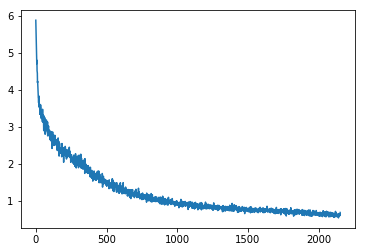

In [26]:
plt.plot(loss_track)

In [27]:
# Save parameters for checkpoint
save_params(save_path)

In [28]:
load_path = load_params()

In [30]:
def sentence_to_seq(sentence, vocab_to_int):
    results = []
    for word in sentence.split(" "):
        if word in vocab_to_int:
            results.append(vocab_to_int[word])
        else:
            results.append(vocab_to_int['<UNK>'])
            
    return results

translate_sentence = 'how are you doing?'

translate_sentence = sentence_to_seq(translate_sentence, source_vocab_to_int)

loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph,config=tf.ConfigProto(use_per_session_threads=True)) as sess:
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess,coord=coord)    
    # Load saved model
    loader = tf.train.import_meta_graph(load_path + '.meta')
    loader.restore(sess, load_path)

    input_data = loaded_graph.get_tensor_by_name('input:0')
    logits = loaded_graph.get_tensor_by_name('predictions:0')
    target_sequence_length = loaded_graph.get_tensor_by_name('target_sequence_length:0')
    keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')

    translate_logits = sess.run(logits, {input_data: [translate_sentence]*batch_size,
                                         target_sequence_length: [len(translate_sentence)*2]*batch_size,
                                         keep_prob: 1.0})[0]

print('Input')
print('  Word Ids:      {}'.format([i for i in translate_sentence]))
print('  English Words: {}'.format([source_int_to_vocab[i] for i in translate_sentence]))

print('\nPrediction')
print('  Word Ids:      {}'.format([i for i in translate_logits]))
print('  French Words: {}'.format(" ".join([target_int_to_vocab[i] for i in translate_logits])))

INFO:tensorflow:Restoring parameters from checkpoints/abc
Input
  Word Ids:      [218, 42, 167, 2]
  English Words: ['how', 'are', 'you', '<UNK>']

Prediction
  Word Ids:      [320, 90, 23, 1]
  French Words: en mai . <EOS>


In [ ]:
sess.close()